In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


This notebook shows how to use the periodic Lieb-Thirring code. It compute the minimising problem for $L(I, \gamma)$.

With this code, we find that the critical $\gamma$ is

- The crossing for L1 and Lsc is at $\gamma = 1.165378$
- The crossing for Lper and Lsc for the triangular lattice is $\gamma = 1.16542$
- The crossing for Lper and Lsc for the square lattice is $\gamma = 1.165396$

In [116]:
%pylab inline
import scipy.sparse.linalg as LA
import scipy.special as special
import scipy.interpolate as interpolate
import sys

%load_ext autoreload
%autoreload 2
import periodicLT_2d as LT
import computeL1 as LT1

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Length rBZ =  91
Total weights = 1.0, must be 1


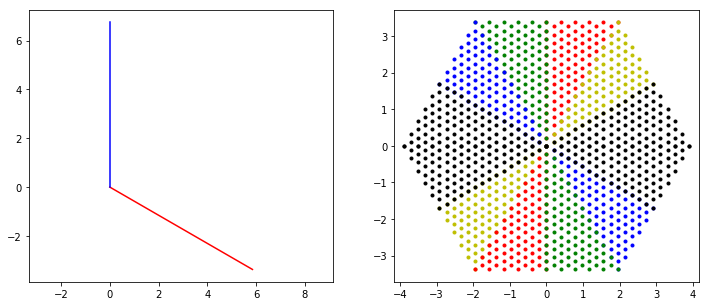

In [117]:
#########
# Test BZ : triangular case
#########

figsize(12, 5)

Nq = 30
rBZ = LT.BZ(Nq, "Triangular")
print("Length rBZ = ", len(rBZ.rBZ))

subplot(121)
plot([0, rBZ.v1[0]], [0, rBZ.v1[1]], 'r')
plot([0, rBZ.v2[0]], [0, rBZ.v2[1]], 'b')
_ = axis("equal")

subplot(122)
for k in rBZ.rBZ:
    k1, k2 = k
    for q in [[k1, k2], [-k1, -k2]]: # inversion q -> -q
        plot(q[0], q[1], 'r.')
        plot(-q[0], q[1], 'g.') # reflection

        plot((-1/2*q[0]+sqrt(3)/2*q[1]), (-sqrt(3)/2*q[0]-1/2*q[1]), 'b.') #4pi/3 rotation
        plot(-(-1/2*q[0]+sqrt(3)/2*q[1]), (-sqrt(3)/2*q[0]-1/2*q[1]), 'y.') #and reflection

        plot((-1/2*q[0]-sqrt(3)/2*q[1]), (sqrt(3)/2*q[0]-1/2*q[1]), 'k.') #2pi/3 rotation
        plot(-(-1/2*q[0]-sqrt(3)/2*q[1]), (sqrt(3)/2*q[0]-1/2*q[1]), 'k.') #and reflection

_ = axis('equal')
print("Total weights = {}, must be 1".format(sum(rBZ.weights)))

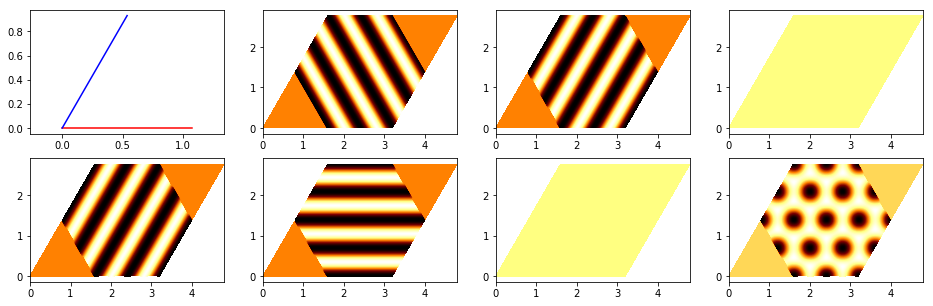

In [118]:
#########
# Test WS : triangular case
#########

figsize(16, 5)

Nb = 40
geometry = "Hexagonal"
rBZ = LT.BZ(Nq, type=geometry)
WS = LT.WS(Nb, type=geometry)

tt = linspace(0, 1-1/Nb, Nb)
xgrid, ygrid = meshgrid(tt, tt)
u = cos(2*pi*(xgrid + ygrid))

subplot(241)
plot([0, WS.a1[0]], [0, WS.a1[1]], 'r')
plot([0, WS.a2[0]], [0, WS.a2[1]], 'b')
_ = axis('equal')

subplot(242) # normal u
WS.plot(u)
_ = axis("equal")

subplot(243) # reflected u
Ru = rBZ.reflect(u)
WS.plot( Ru ) 
_ = axis("equal")

subplot(244) # two reflection = 0
Ru = rBZ.reflect(Ru)
WS.plot( u - Ru ) # reflection
_ = axis("equal")

subplot(245) # rotate
Ru = rBZ.rotate(u)
WS.plot( Ru ) 
_ = axis("equal")

subplot(246) # rotate
Ru = rBZ.rotate(Ru)
WS.plot( Ru ) 
_ = axis("equal")

subplot(247) # three rotations equal 0
Ru = rBZ.rotate(Ru)
WS.plot( u - Ru ) 
_ = axis("equal")

subplot(248) # three rotations equal 0
Ru = rBZ.average_transform(u)
WS.plot( Ru ) 
_ = axis("equal")

In [110]:
Nb, Nq = 30, 20
kappa = 1.1655
I = 15
geometry = "Triangular"

rBZ = LT.BZ(Nq, type = geometry)
WS = LT.WS(Nb, type = geometry)

V0 = LT.get_V0(rBZ, I, Nb)
#V0 = -I*ones((Nb,Nb)) 
V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 1, Niter = 20)


Optimisation with constraint integral = 15, and kappa = 1.1655.
Lsc = 0.036747851094873094
	Iteration 0, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9773915286817525
	Iteration 1, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9900446942053056
	Iteration 2, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9942984772668285
	Iteration 3, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9960011830779659
	Iteration 4, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.996757247738332
	Iteration 5, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9971157188431972
	Iteration 6, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9972932551565544
	Iteration 7, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.997383861613531
	Iteration 8, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9974310912422464
	Iteration 9, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.997456085300137
	Iteration 10, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9974694575411317
	Iteration 11, I = 15.000000, kappa = 1.1655, LT/Lsc = 0.9974766690459248
	Iteration 12, I = 15.000000, kap

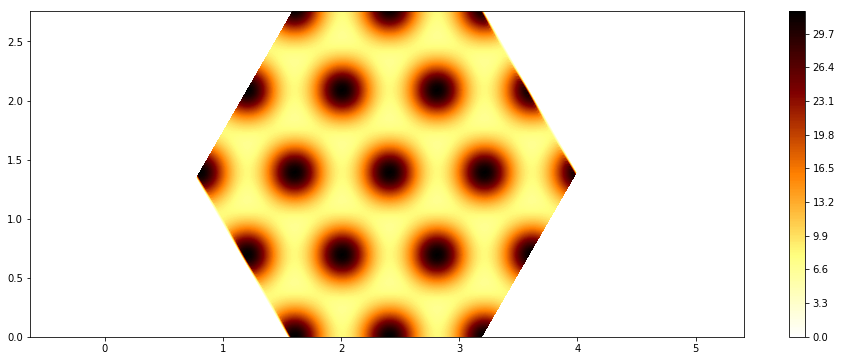

In [111]:
WS.plot(-V)
axis('equal')
colorbar()

In [113]:
# get some info
neigs = 5
eigs, Llt = LT.get_info(V, rBZ, kappa, neigs = neigs)

For kappa = 1.1655
sum_eigs = 12.91112360759497, integral = 15.0, L/Lsc > 0.9974852204913955


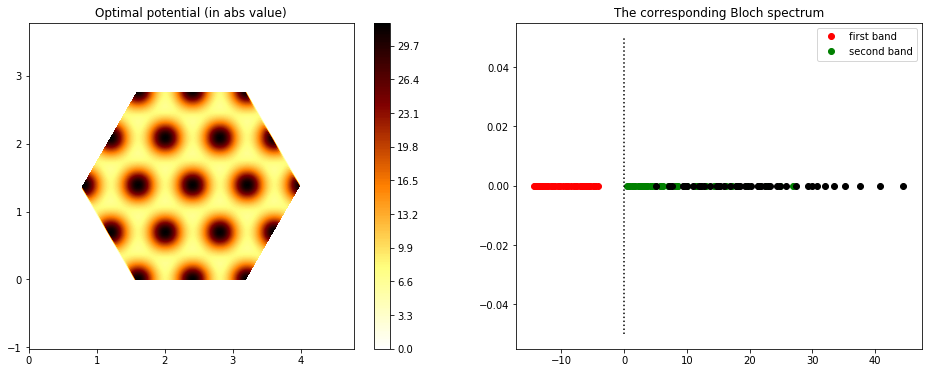

In [114]:
figsize(16, 6)

subplot(1,2,1)
WS.plot( -V )
title("Optimal potential (in abs value)")
_ = axis('equal')
colorbar()

subplot(1,2,2)
Nrq = len( rBZ.rBZ )
plot(eigs[:, 0], zeros(Nrq), 'or', label="first band")
plot(eigs[:, 1], zeros(Nrq), 'og', label="second band")

for i in range(2,3):
    plot(eigs[:, i], zeros(Nrq), 'ok')
plot([0, 0], [-0.05, 0.05], ':k')
title("The corresponding Bloch spectrum")
legend()

# Creating some initial conditions for the cluster

In [546]:
kappa = 1.1654
II = 2*linspace(24, 54, 16)

V0 = V
for I in II:
    V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 2, Niter = 10)
    V0 = V
    name = "Data/V0/V0_I{:d}_{}".format(int(I), geometry)
    print("Name = ", name)
    np.save(name, V)


Optimisation with constraint integral = 48.0, and kappa = 1.1654.
Lsc = 0.036749548141658664
	Iteration 0, kappa = 1.1654, LT/Lsc = 0.9662728956272452
	Iteration 1, kappa = 1.1654, LT/Lsc = 0.9929060912726817
	Iteration 2, kappa = 1.1654, LT/Lsc = 0.9976426774695757
	Iteration 3, kappa = 1.1654, LT/Lsc = 0.9986849569538906
	Iteration 4, kappa = 1.1654, LT/Lsc = 0.998937699181074
	Iteration 5, kappa = 1.1654, LT/Lsc = 0.9990017373860332
	Iteration 6, kappa = 1.1654, LT/Lsc = 0.9990182988851539
	Iteration 7, kappa = 1.1654, LT/Lsc = 0.999022624619834
	Iteration 8, kappa = 1.1654, LT/Lsc = 0.9990237600240798
	Iteration 9, kappa = 1.1654, LT/Lsc = 0.9990240587779095
No convergence after 10 iterations
Name =  Data/V0/V0_I48_Hexagonal

Optimisation with constraint integral = 52.0, and kappa = 1.1654.
Lsc = 0.036749548141658664
	Iteration 0, kappa = 1.1654, LT/Lsc = 0.998889958352812
	Iteration 1, kappa = 1.1654, LT/Lsc = 0.9993730405794313
	Iteration 2, kappa = 1.1654, LT/Lsc = 0.9994980585

	Iteration 0, kappa = 1.1654, LT/Lsc = 0.999831450459764
	Iteration 1, kappa = 1.1654, LT/Lsc = 0.9999550996979395
	Iteration 2, kappa = 1.1654, LT/Lsc = 0.9999842413972474
	Iteration 3, kappa = 1.1654, LT/Lsc = 0.9999911123720017
	Iteration 4, kappa = 1.1654, LT/Lsc = 0.9999927268228503
	Iteration 5, kappa = 1.1654, LT/Lsc = 0.999993105317627
	Iteration 6, kappa = 1.1654, LT/Lsc = 0.9999931939480641
	Iteration 7, kappa = 1.1654, LT/Lsc = 0.9999932146900595
	Iteration 8, kappa = 1.1654, LT/Lsc = 0.9999932195428779
	Iteration 9, kappa = 1.1654, LT/Lsc = 0.9999932206780826
No convergence after 10 iterations
Name =  Data/V0/V0_I92_Hexagonal

Optimisation with constraint integral = 96.0, and kappa = 1.1654.
Lsc = 0.036749548141658664
	Iteration 0, kappa = 1.1654, LT/Lsc = 0.9998445494042155
	Iteration 1, kappa = 1.1654, LT/Lsc = 0.9999577854366593
	Iteration 2, kappa = 1.1654, LT/Lsc = 0.9999844505455732
	Iteration 3, kappa = 1.1654, LT/Lsc = 0.9999907344361434
	Iteration 4, kappa = 1.1654

In [522]:
# get some info
neigs = 5
eigs, Llt = LT.get_info(V, rBZ, kappa, neigs = neigs)

For kappa = 1.1655
sum_eigs = 51.96186660871796, integral = 28.500000000000004, L/Lsc > 0.9999683432622238


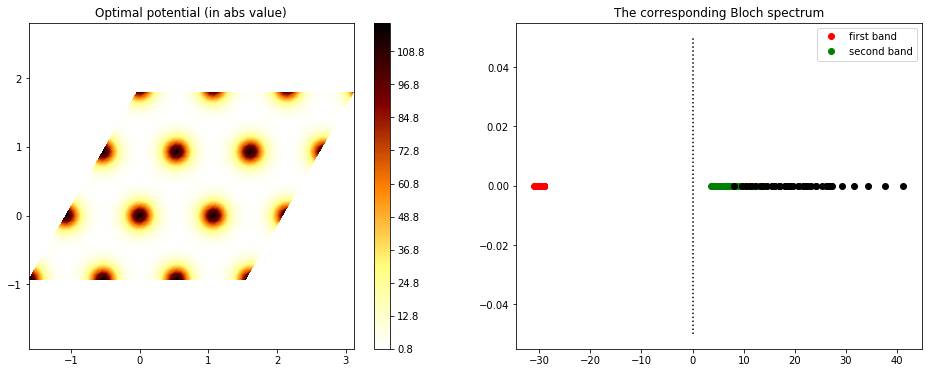

In [523]:
figsize(16, 6)

subplot(1,2,1)
WS.plot( -V )
title("Optimal potential (in abs value)")
_ = axis('equal')
colorbar()

subplot(1,2,2)
Nrq = len( rBZ.rBZ )
plot(eigs[:, 0], zeros(Nrq), 'or', label="first band")
plot(eigs[:, 1], zeros(Nrq), 'og', label="second band")

for i in range(2,3):
    plot(eigs[:, i], zeros(Nrq), 'ok')
plot([0, 0], [-0.05, 0.05], ':k')
title("The corresponding Bloch spectrum")
legend()

In [507]:
Nq = 30
Nb = 40
geometry = "Triangular"

rBZ = LT.BZ(Nq, type=geometry)

kappa = 1.165415
I = 28.5

#V0 = LT.get_V0(rBZ, I, Nb)
V0 = load("Data/V0/V_Triangular_Nb40_kappa116541_I285.npy")
V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 2)


Optimisation with constraint integral = 28.5, and kappa = 1.165415.
Lsc = 0.03674929357464859
	Iteration 0, kappa = 1.165415, LT/Lsc = 1.0000007924702603
	Iteration 1, kappa = 1.165415, LT/Lsc = 1.0000007924739633
	Iteration 2, kappa = 1.165415, LT/Lsc = 1.0000007924748273
	Iteration 3, kappa = 1.165415, LT/Lsc = 1.0000007924750316
	Iteration 4, kappa = 1.165415, LT/Lsc = 1.0000007924750793
	Iteration 5, kappa = 1.165415, LT/Lsc = 1.0000007924750913
	Iteration 6, kappa = 1.165415, LT/Lsc = 1.0000007924750927
	Iteration 7, kappa = 1.165415, LT/Lsc = 1.000000792475094
Convergence after 7 iterations


# Example for the Square lattice

Length rBZ =  21
Total weights = 1.0, must be 1


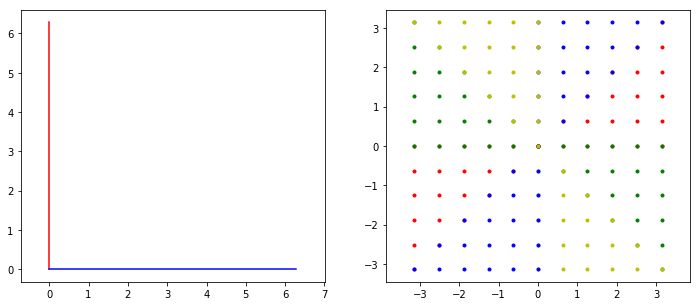

In [194]:
#########
# Test BZ : Square case
#########

figsize(12, 5)

Nq = 10
rBZ = LT.BZ(Nq, "Square")
print("Length rBZ = ", len(rBZ.rBZ))

subplot(121)
plot([0, rBZ.v1[0]], [0, rBZ.v1[1]], 'r')
plot([0, rBZ.v2[0]], [0, rBZ.v2[1]], 'b')
_ = axis("equal")

subplot(122)
for k in rBZ.rBZ:
    k1, k2 = k
    for q in [[k1, k2], [-k1, -k2]]: # inversion q -> -q
        plot(q[0], q[1], 'r.')
        plot(q[0], -q[1], 'g.') # reflection
        plot(q[1], q[0], 'b.')
        plot(q[1], -q[0], 'y.')
_ = axis('equal')
print("Total weights = {}, must be 1".format(sum(rBZ.weights)))

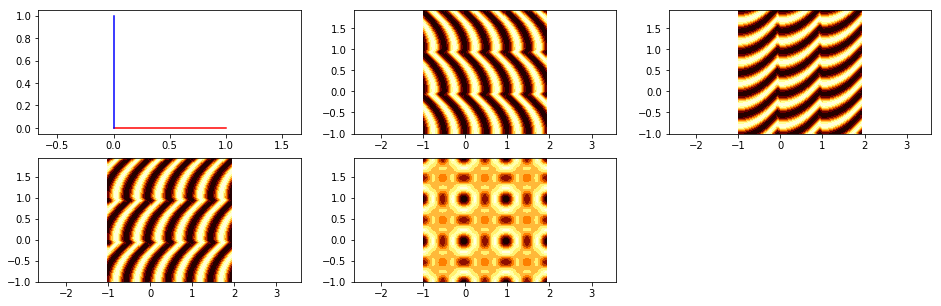

In [205]:
#########
# Test WS : Square case
#########

figsize(16, 5)

Nb = 15
WS = LT.WS(Nb, type="Square")

tt = linspace(0, 1-1/Nb, Nb)
xgrid, ygrid = meshgrid(tt, tt)
u = cos(2*pi*xgrid + 4*ygrid**2)**2

subplot(231)
plot([0, WS.a1[0]], [0, WS.a1[1]], 'r')
plot([0, WS.a2[0]], [0, WS.a2[1]], 'b')
_ = axis('equal')

subplot(232) # normal u
WS.plot(u)
_ = axis("equal")

subplot(233) # normal u
Ru = rBZ.rotate(u)
WS.plot(Ru)
_ = axis("equal")

subplot(234) # normal u
Ru = rBZ.reflect(u)
WS.plot(Ru)
_ = axis("equal")


subplot(235) # three rotations equal 0
Ru = rBZ.average_transform(u)
WS.plot( Ru ) 
_ = axis("equal")

In [215]:
kappa = 1.1654
I = 25

V0 = LT.get_V0(rBZ, I, Nb)
V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 1)


Optimisation with constraint integral = 25, and kappa = 1.1654.
Lsc = 0.036749548141658664
	Iteration 0, kappa = 1.1654, LT/Lsc = 0.9887423883180618
	Iteration 1, kappa = 1.1654, LT/Lsc = 0.997275539543373
	Iteration 2, kappa = 1.1654, LT/Lsc = 0.9991893351032014
	Iteration 3, kappa = 1.1654, LT/Lsc = 0.9996767796103743
	Iteration 4, kappa = 1.1654, LT/Lsc = 0.9998000184687179
	Iteration 5, kappa = 1.1654, LT/Lsc = 0.9998307098662219
	Iteration 6, kappa = 1.1654, LT/Lsc = 0.9998382787894142
	Iteration 7, kappa = 1.1654, LT/Lsc = 0.9998401354007506
	Iteration 8, kappa = 1.1654, LT/Lsc = 0.9998405895537397
	Iteration 9, kappa = 1.1654, LT/Lsc = 0.9998407004902976
	Iteration 10, kappa = 1.1654, LT/Lsc = 0.9998407275699677
	Iteration 11, kappa = 1.1654, LT/Lsc = 0.9998407341778353
	Iteration 12, kappa = 1.1654, LT/Lsc = 0.9998407357899821
	Iteration 13, kappa = 1.1654, LT/Lsc = 0.9998407361832696
	Iteration 14, kappa = 1.1654, LT/Lsc = 0.9998407362792098
	Iteration 15, kappa = 1.1654, LT/

In [351]:
# get some info
neigs = 5
eigs, Llt = LT.get_info(V, rBZ, kappa, neigs = neigs)

For kappa = 1.165397
sum_eigs = 72.2969766385929, integral = 33.2, L/Lsc > 0.9999992811618651


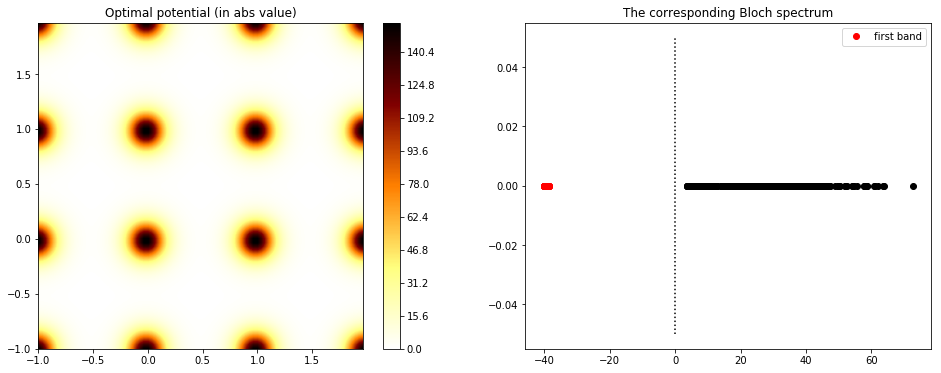

In [353]:
figsize(16, 6)

subplot(1,2,1)
WS.plot( -V )
title("Optimal potential (in abs value)")
_ = axis('equal')
colorbar()

subplot(1,2,2)
Nrq = len( rBZ.rBZ )
plot(eigs[:, 0], zeros(Nrq), 'or', label="first band")

for i in range(1,neigs):
    plot(eigs[:, i], zeros(Nrq), 'ok')
plot([0, 0], [-0.05, 0.05], ':k')
title("The corresponding Bloch spectrum")
legend()

# Image for kappa fixed

In [123]:
Nq = 20
Nb = 30
geometry = "Triangular"

rBZ = LT.BZ(Nq, type=geometry)

kappa = 1.165396
kappa = 1.1654
II = linspace(10, 20, 21)

#II = linspace(25, 55, 20)
#II = linspace(28, 30, 5)
# 25 is a good starting point

V0 = LT.get_V0(rBZ, II[0], Nb)

VIrecord, LIrecord = [], []
for I in II:
    V0 = LT.get_V0(rBZ, I, Nb)
    V, L, _, _ = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 1)
    #V0 = V
    V0 = LT.get_V0(rBZ, I, Nb)
    VIrecord.append(V)
    LIrecord.append(L)


Optimisation with constraint integral = 10.0, and kappa = 1.1654.
Lsc = 0.036749548141658664
	Iteration 0, I = 10.000000, kappa = 1.1654, LT/Lsc = 0.9090724175886493
	Iteration 1, I = 10.000000, kappa = 1.1654, LT/Lsc = 0.9705427662152292
	Iteration 2, I = 10.000000, kappa = 1.1654, LT/Lsc = 0.990814384139954
	Iteration 3, I = 10.000000, kappa = 1.1654, LT/Lsc = 0.9975867189841664
	Iteration 4, I = 10.000000, kappa = 1.1654, LT/Lsc = 0.9997374948747435
	Iteration 5, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.000389110032273
	Iteration 6, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0005803698176081
	Iteration 7, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0006354565027373
	Iteration 8, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0006511544221401
	Iteration 9, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0006556017890287
	Iteration 10, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0006568578082142
	Iteration 11, I = 10.000000, kappa = 1.1654, LT/Lsc = 1.0006572119340142
	Iteration 12, I = 10.000000, 

	Iteration 2, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9796223393195529
	Iteration 3, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9852993084264174
	Iteration 4, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9885301761583454
	Iteration 5, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9907320150694189
	Iteration 6, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9924823454141708
	Iteration 7, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9936856403305045
	Iteration 8, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9945468267142011
	Iteration 9, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9951823627605471
	Iteration 10, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9956625537337235
	Iteration 11, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9960320109355565
	Iteration 12, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9963202560162407
	Iteration 13, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.996547540530531
	Iteration 14, I = 12.500000, kappa = 1.1654, LT/Lsc = 0.9967281963975597
	Iteration 15, I = 12.500000, kappa = 1.1654, L

	Iteration 5, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9971374005613652
	Iteration 6, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.99731466089214
	Iteration 7, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9974051046969715
	Iteration 8, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9974522374746166
	Iteration 9, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9974771735835445
	Iteration 10, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9974905111013485
	Iteration 11, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9974977018130179
	Iteration 12, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975016011752105
	Iteration 13, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975037247613329
	Iteration 14, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975048849063808
	Iteration 15, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975055201832791
	Iteration 16, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975058686483605
	Iteration 17, I = 15.000000, kappa = 1.1654, LT/Lsc = 0.9975060600330287
	Iteration 18, I = 15.000000, kappa = 1.1654,

	Iteration 8, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989398175252648
	Iteration 9, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989405430663791
	Iteration 10, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989408063109376
	Iteration 11, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409019486805
	Iteration 12, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409367218302
	Iteration 13, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.998940949371131
	Iteration 14, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409539738358
	Iteration 15, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409556489388
	Iteration 16, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409562586262
	Iteration 17, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409564805495
	Iteration 18, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409565613326
	Iteration 19, I = 17.500000, kappa = 1.1654, LT/Lsc = 0.9989409565907377
No convergence after 20 iterations

Optimisation with constraint integral = 18.0, and kappa = 1.1654.
Lsc = 0.03674

	Iteration 11, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137892034846
	Iteration 12, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137896725678
	Iteration 13, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898062529
	Iteration 14, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898443531
	Iteration 15, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898552153
	Iteration 16, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.999613789858308
	Iteration 17, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898591912
	Iteration 18, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898594443
	Iteration 19, I = 20.000000, kappa = 1.1654, LT/Lsc = 0.9996137898595141
No convergence after 20 iterations


In [124]:
name = "2d_triangular_kappa{:6d}_allI2".format(int(100000*kappa))
dico_record = {
    "Nb": Nb,
    "Nq": Nq,
    "kappa": kappa,
    "II": II,
    "VIrecord": VIrecord,
    "LIrecord": LIrecord
}
print(name)

2d_triangular_kappa116540_allI2


In [125]:
np.save("Data/"+name, dico_record)

L1/Lsc =  0.999991481015178


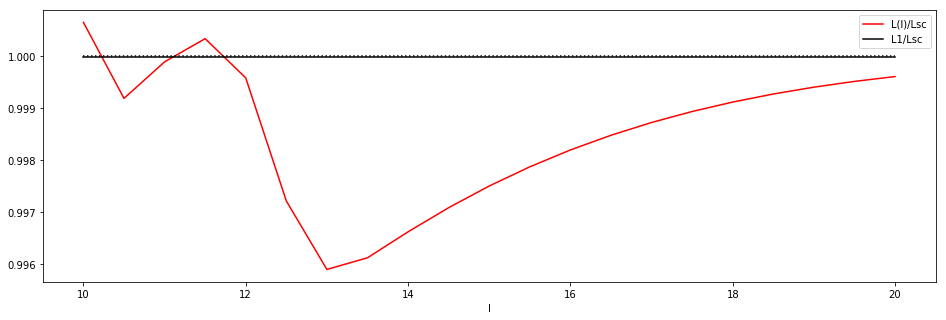

In [126]:
L1 = LT1.L1(kappa)
Lsc = LT.Lsc(kappa)

print("L1/Lsc = ", L1/Lsc)

plot(II, LIrecord/Lsc, 'r', label='L(I)/Lsc')
plot([II[0], II[-1]], [L1/Lsc, L1/Lsc], 'k', label='L1/Lsc')
plot([II[0], II[-1]], [1, 1], ':k')

xlabel('I')
legend()
#ticks = list( linspace(0.999975, 1.000010, 8))
#yticks(ticks, [str(f) for f in ticks])


savefig(name+".png", bbox_inches='tight')

# The best one

In [357]:
# Square
Nb, Nq, geometry = 30, 20, "Square"
kappa = 1.165396
I = 33.3

rBZ = LT.BZ(Nq, type=geometry)
#V0 = LT.get_V0(rBZ, I, Nb)
V0 = V

V, L, listV, listL = LT.LT_constraint(V0, rBZ, kappa, I, neigs = 1)


Optimisation with constraint integral = 33.3, and kappa = 1.165396.
Lsc = 0.03674961602679032
	Iteration 0, kappa = 1.165396, LT/Lsc = 0.9999989198563993
	Iteration 1, kappa = 1.165396, LT/Lsc = 0.9999994850309268
	Iteration 2, kappa = 1.165396, LT/Lsc = 0.9999996163348367
	Iteration 3, kappa = 1.165396, LT/Lsc = 0.9999996470989801
	Iteration 4, kappa = 1.165396, LT/Lsc = 0.9999996543133266
	Iteration 5, kappa = 1.165396, LT/Lsc = 0.9999996560051343
	Iteration 6, kappa = 1.165396, LT/Lsc = 0.9999996564018496
	Iteration 7, kappa = 1.165396, LT/Lsc = 0.9999996564948725
	Iteration 8, kappa = 1.165396, LT/Lsc = 0.9999996565166843
	Iteration 9, kappa = 1.165396, LT/Lsc = 0.9999996565217999
	Iteration 10, kappa = 1.165396, LT/Lsc = 0.9999996565229985
	Iteration 11, kappa = 1.165396, LT/Lsc = 0.99999965652328
	Iteration 12, kappa = 1.165396, LT/Lsc = 0.9999996565233463
	Iteration 13, kappa = 1.165396, LT/Lsc = 0.9999996565233612
	Iteration 14, kappa = 1.165396, LT/Lsc = 0.9999996565233646
	I

In [359]:
figsize(8,8)
print("I = {}".format(II[iI]))
#V = VIrecord[iI]
rho, sum_eigs, kinetic = LT.compute_rho(V, rBZ, kappa, neigs = 2)


I = 33.8


[]

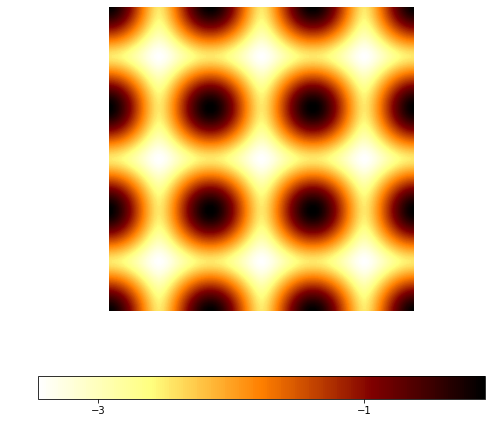

In [442]:
fig = plt.figure(1)
WS = LT.WS(Nb, type="Square")
ax = fig.add_subplot(111)

WS.plot(log(rho)/log(10))
_ = axis("equal")
_ = axis("off")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#colorbar(ticks = [-3, -2], tickslabel=["1", "2"])

ticks = linspace(-3, -1, 2)
tickslabel = [' ' for t in ticks]

tickslabel[0] = r'$10^{-3}$'
#tickslabel[10] = r'$10^{-2}$'
#tickslabel[20] = r'$10^{-1}$'

cbar = colorbar( ticks=ticks, orientation = "horizontal")
cbar.ax.set_yticklabels(tickslabel)

#savefig("optimal_logDensity_square_kappa1165396_I333.png")


In [443]:
tickslabel

['$10^{-3}$', ' ']

In [436]:
ticks

array([-3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ,
       -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ])